### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### Loading and Understanding the Dataset

In [2]:
# Load Dataset

df = pd.read_csv('Salary_Data.csv')

In [3]:
# View few first rows of the dataset

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# Understand dataset's dimensions

df.shape

(6704, 6)

In [5]:
# Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
# Summary statistics

df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

##### Since we dont have too many missing values, we will remove the missing data from the dataset.

In [8]:
df_clean = df.dropna().copy()

df_clean.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

##### We will also convert 'Years of Experience' and 'Age' to int, to make outputs cleaner.

In [9]:
df_clean['Years of Experience'] = df_clean['Years of Experience'].astype(int)
df_clean['Age'] = df_clean['Age'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   int64  
 5   Salary               6698 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 366.3+ KB


##### rename columns

In [10]:
df_clean = df_clean.rename(columns = {'Education Level': 'Education_Level', 'Job Title': 'Job_Title', 'Years of Experience': 'Years_of_Experience'})
df_clean.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0


In [11]:
df_clean['Education_Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [12]:
df_clean['Education_Level'] = df_clean['Education_Level'].str.strip().str.lower()
df_clean['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', "bachelor's degree",
       "master's degree", 'high school'], dtype=object)

In [13]:
edu_map = {
    "high school": "High School",
    "bachelor's degree": "Bachelor's Degree",
    "bachelor's": "Bachelor's Degree",
    "master's degree": "Master's Degree",
    "master's": "Master's Degree",
    "phd": "PhD"
}

df_clean['Education_Level'] = df_clean['Education_Level'].map(edu_map)
df_clean['Education_Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

# Exploratory Data Analysis

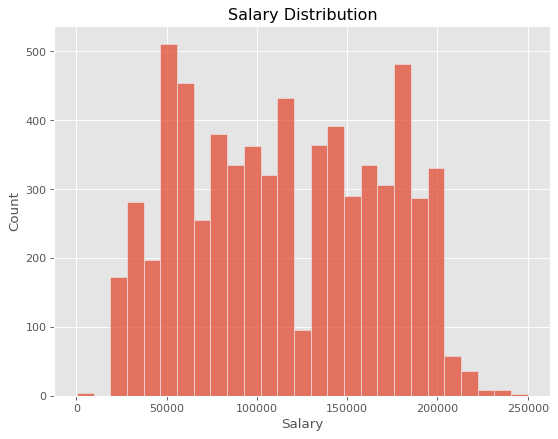

In [14]:
plt.figure(figsize=(8, 6), dpi=80)

sns.histplot(data = df_clean, x = 'Salary')
plt.title('Salary Distribution')
plt.show()

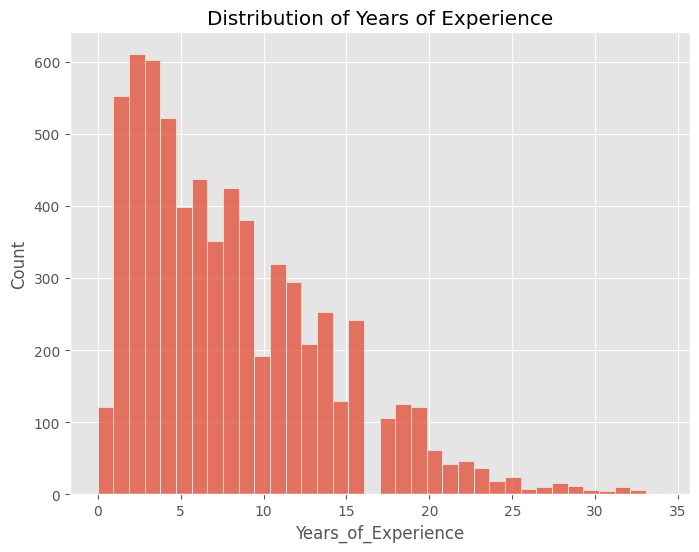

In [15]:
plt.figure(figsize=(8, 6))

sns.histplot(data = df_clean, x = 'Years_of_Experience')
plt.title('Distribution of Years of Experience')
plt.show()

As expected we got left skewed histogram, a lot of employees with mid-range experience (5-15 years) and fewer with extremely high experience (20+ years)

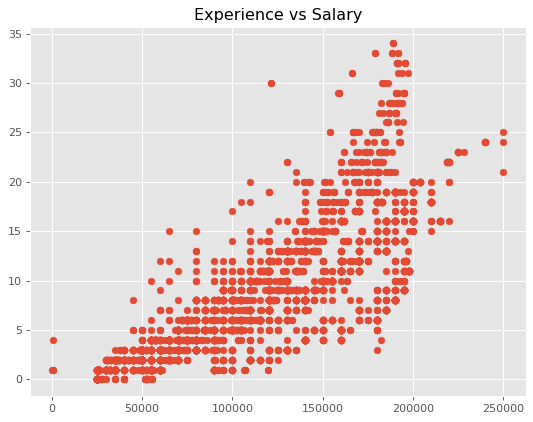

In [16]:
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(df_clean['Salary'], df_clean['Years_of_Experience'])
plt.title('Experience vs Salary')
plt.show()

We can observe a clear positive trend, generally, as years of experience increase, salary tends to increase.

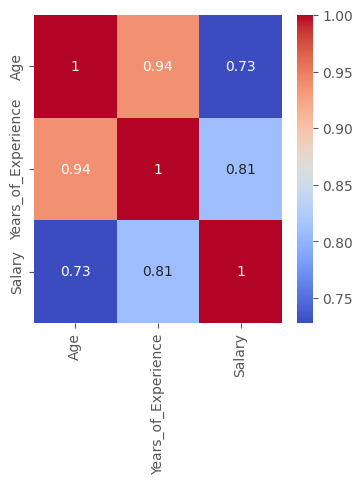

In [17]:
plt.figure(figsize = (4, 4))

sns.heatmap(df_clean[['Age', 'Years_of_Experience', 'Salary']].corr(), annot = True, cmap = 'coolwarm')
plt.show()

* We can notice a strong positive relationship between Years of Experience and Salary as we saw with scatter plot too.
* Age and Years of Experience highly correlated aswell, since more experience employees tend to be older.
* Age and Salary a bit lower, but still positive. Age influences salary partly because it proxies experiencem but age alone isn't as strong predictor as actual experience.
* These correlations confirm that Years of Experience is the single strongest predictor of salary.

# Building Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
df_model = df_clean.copy()

In [20]:
X = df_model[['Years_of_Experience']]
y = df_model['Salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 7072.512041432737
Intercept (b): 58204.32268794819


### Evaluating the Model

In [28]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [25]:
# Predict salaries for the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R^2: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R^2: 0.656
RMSE: 31326.34
